<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Hyperparameter-Tuning-and-Pruning-in-Decision-Trees---Lab" data-toc-modified-id="Hyperparameter-Tuning-and-Pruning-in-Decision-Trees---Lab-1">Hyperparameter Tuning and Pruning in Decision Trees - Lab</a></span><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1.1">Introduction</a></span></li><li><span><a href="#Objectives" data-toc-modified-id="Objectives-1.2">Objectives</a></span></li><li><span><a href="#Import-necessary-libraries" data-toc-modified-id="Import-necessary-libraries-1.3">Import necessary libraries</a></span></li><li><span><a href="#Read-the-Titanic-Dataset" data-toc-modified-id="Read-the-Titanic-Dataset-1.4">Read the Titanic Dataset</a></span></li><li><span><a href="#Create-a-70/30-Train/Test-split" data-toc-modified-id="Create-a-70/30-Train/Test-split-1.5">Create a 70/30 Train/Test split</a></span></li><li><span><a href="#Train-a-Vanilla-Classifier" data-toc-modified-id="Train-a-Vanilla-Classifier-1.6">Train a Vanilla Classifier</a></span></li><li><span><a href="#Make-predictions" data-toc-modified-id="Make-predictions-1.7">Make predictions</a></span><ul class="toc-item"><li><span><a href="#def-calc_roc_auc" data-toc-modified-id="def-calc_roc_auc-1.7.1">def calc_roc_auc</a></span></li><li><span><a href="#def-tune_params" data-toc-modified-id="def-tune_params-1.7.2">def tune_params</a></span></li></ul></li><li><span><a href="#Maximum-Tree-Depth" data-toc-modified-id="Maximum-Tree-Depth-1.8">Maximum Tree Depth</a></span></li><li><span><a href="#Minimum-Sample-Split" data-toc-modified-id="Minimum-Sample-Split-1.9">Minimum Sample Split</a></span></li><li><span><a href="#Minimum-Sample-Leafs" data-toc-modified-id="Minimum-Sample-Leafs-1.10">Minimum Sample Leafs</a></span></li><li><span><a href="#Maximum-Features" data-toc-modified-id="Maximum-Features-1.11">Maximum Features</a></span></li><li><span><a href="#Re-train-the-classifier-with-chosen-values" data-toc-modified-id="Re-train-the-classifier-with-chosen-values-1.12">Re-train the classifier with chosen values</a></span></li><li><span><a href="#Summary" data-toc-modified-id="Summary-1.13">Summary</a></span></li></ul></li></ul></div>

# Hyperparameter Tuning and Pruning in Decision Trees - Lab

## Introduction

In this lab we will use the titanic dataset to see the impact of tree pruning and hyper parameter tuning on the predictive performance of decision tree classifier. Pruning reduces the size of decision trees by removing nodes of the tree that do not provide power to classify instances. Decision trees are the most susceptible out of all the machine learning algorithms to overfitting and effective pruning can reduce this likelihood. In this lab, we shall work with the Titanic dataset and see how we can tweak different hyper parameters for optimal pruning of the trees. 

## Objectives
You will be able to:
- Demonstrate how pruning is performed for decision trees 
- Understand and explain the role of different Decision tree hyperparameters
- Select the best values for chosen hyperparameters and monitor the improvemen in performance

## Import necessary libraries

Let's first import the libraries you would need for this lab. 

In [93]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
plt.style.use('seaborn')

## Read the Titanic Dataset

In the repo, we have made titanic dataset , all cleaned up and pre-processed for you, so that you can focus on pruning and optimization. The features set is available as `featues.csv` and target variable as `target.csv`. 
- Load these files into separate dataframes below.
- Check the shape for consistency and the view the head 

In [94]:
# Load features and target variables
X = pd.read_csv('features.csv')
Y = pd.read_csv('target.csv')
# Your code here 
print(X.shape,Y.shape)

(891, 13) (891, 1)


In [95]:
X.head()

,PassengerId,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,22.0,1,0,7.2500,0,0,1,0,1,0,0,1
1,2,38.0,1,0,71.2833,1,0,0,1,0,1,0,0
2,3,26.0,0,0,7.9250,0,0,1,1,0,0,0,1
3,4,35.0,1,0,53.1000,1,0,0,1,0,0,0,1
4,5,35.0,0,0,8.0500,0,0,1,0,1,0,0,1


In [96]:
Y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


This is great. Now that we have our x (feat) and y(target), we can go ahead and make a split necessary for supervised learning.

## Create a 70/30 Train/Test split
- Using features and target variables above , create a 70/30 split using 

In [97]:
# Create a 70/30 split for given X and y 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

# Your code here 

So now we have our data ready for training, lets first train a DT classifier with this data
## Train a Vanilla Classifier

__Note:__ The term "vanilla" is used for a machine learning algorithm with its default settings (no tweaking/tuning).

- Create a decision tree instance
- Fit a DT classifier with training dataset using all default settings for hyperparameters i.e. we dont change any parameter.
- Set the impurity crietria to "entropy".

In [98]:
# Train the classifier using training data 
dtc = DecisionTreeClassifier(criterion='entropy')
dtc.fit(X_train, y_train)

# Your code here 

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

## Make predictions 
- Create a set of predictions using the test set 
- Using `y_test` and `y_pred`, calculate the AUC (Area under curve) to check the predictive performance

### def calc_roc_auc

In [150]:
def calc_roc_auc(X_test,y_test,dtc,verbose=False):
    """Tests the results of an already-fit classifer. 
    Takes X_test, y_test, classifer, verbose (True" print result)
    Returns the AUC for the roc_curve as a %"""
    y_pred = dtc.predict(X_test)

    FP_rate, TP_rate, thresh = roc_curve(y_test,y_pred)
    roc_auc = auc(FP_rate,TP_rate)
    roc_auc_perc = round(roc_auc*100,3)
    # Your code here 
    if verbose:
        print(f"roc_curve's auc = {roc_auc_perc}%")
    return roc_auc_perc

In [149]:
# params={param_name:param_values}
# dtc.set_params(params)

In [100]:
# Make predictions using test set 
y_pred = dtc.predict(X_test)

FP_rate, TP_rate, thresh = roc_curve(y_test,y_pred)
roc_auc = auc(FP_rate,TP_rate)
# Your code here 
print(f'roc_curve auc = {roc_auc}')

# Check the AUC of predictions
calc_roc_auc(X_test,y_test,dtc)
# roc_auc()
# Your code here 

roc_curve auc = 0.6973232049195154


69.732

### def tune_params

In [138]:
def tune_params(param_name, param_values):
    """Takes in param_name to tune with param_values, plots train vs test AUC's. 
    Returns df_results and df_style with color coded results"""
    res_list = [[param_name,'train_roc_auc','test_roc_auc']]

    # Loop through all values in param_values
    for value in param_values:
        # Create Model, set params
        dtc_temp = DecisionTreeClassifier(criterion='entropy')
        params={param_name:value}
        dtc_temp.set_params(**params)

        # Fit model
        dtc_temp.fit(X_train, y_train)
        
        # Get roc_auc for training data
        train_roc_auc = calc_roc_auc(X_train,y_train,dtc_temp)
        # Get roc_auc for test data
        test_res_roc_auc = calc_roc_auc(X_test,y_test,dtc_temp)
        # Append value and results to res_list
        res_list.append([value,train_roc_auc,test_res_roc_auc])

    # Turn results into df_results (basically same as using list2df)
    df_results = pd.DataFrame(res_list[1:],columns=res_list[0])
    df_results.set_index(param_name,inplace=True)
    
    # Plot df_results
    df_results.plot()
        
    # Color-coded dataframe s
    import seaborn as sns
    cm = sns.light_palette("green", as_cmap=True)
    df_syle = df_results.style.background_gradient(cmap=cm)#,low=results.min(),high=results.max())

    return df_results, df_syle

## Maximum Tree Depth

Let's first check for the best depth parameter for our decision tree. 
- Create an array for for depth values ranging from 1 - 32. 
- In a loop, train the classifier for each depth value (32 runs) 
- Calculate the training and test AUC for each run 
- Plot a graph to show under/over fitting and optimal value 
- Interpret the results

,train_roc_auc,test_roc_auc
max_depth,,
1,76.829,76.111
2,76.829,76.111
3,79.906,80.15
4,84.331,79.149
5,84.921,75.903
6,84.985,75.457
7,86.644,74.564
8,89.165,76.849
9,89.278,74.257


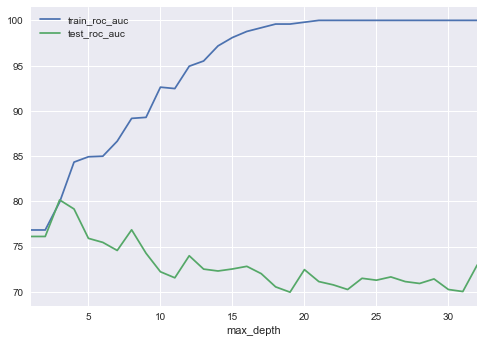

In [139]:
# Identify the optimal tree depth for given data
depths = np.array(range(1,33))
param_name = 'max_depth'
results, s = tune_params('max_depth',depths)
s

In [105]:
# You observations here 


## Minimum Sample Split

Now check for the best `min_samples_splits` parameter for our decision tree. 
- Create an array for for `min_sample_splits` values ranging from 0.1 - 1 with an increment of 0.1 
- In a loop, train the classifier for each `min_samples_splits` value (10 runs) 
- Calculate the training and test AUC for each run 
- Plot a graph to show under/over fitting and optimal value 
- Interpret the results

,train_roc_auc,test_roc_auc
min_samples_split,,
0.1,84.342,78.857
0.2,78.953,78.103
0.30000000000000004,78.473,78.396
0.4,78.473,78.396
0.5,76.829,76.111
0.6,76.829,76.111
0.7000000000000001,76.829,76.111
0.8,76.829,76.111
0.9,76.829,76.111


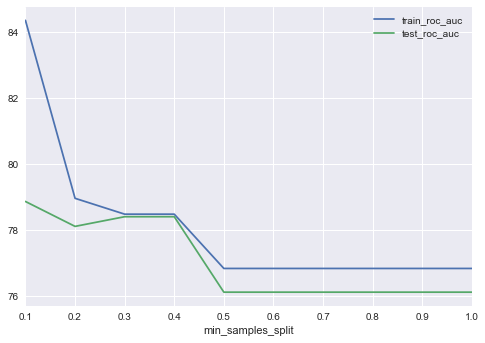

In [140]:
# Identify the optimal min-samples-split for given data
param_name = 'min_samples_split'
param_values = np.linspace(0.1,1.0,10, endpoint=True)

results, s = tune_params(param_name,param_values)
s
# Your code here 

In [171]:
# Your observations
roc stabilizes at 0.5


## Minimum Sample Leafs

Now check for the best `min_samples_leafs` parameter value for our decision tree. 
- Create an array for for `min_samples_leafs` values ranging from 0.1 - 0.5 with an increment of 0.1 
- In a loop, train the classifier for each `min_samples_leafs` value (5 runs) 
- Calculate the training and test AUC for each run 
- Plot a graph to show under/over fitting and optimal value 
- Interpret the results

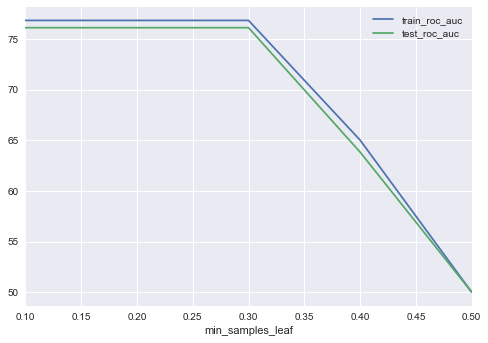

In [142]:
# Calculate the optimal value for minimum sample leafs
param_name = 'min_samples_leaf'
param_values = np.linspace(0.1,0.5,5, endpoint=True)
# Your code here 
res, s = tune_params(param_name, param_values)

In [190]:
# Your observations here 
best values are between 0 and 0.3


## Maximum Features

Now check for the best `max_features` parameter value for our decision tree. 
- Create an array for for `max_features` values ranging from 1 - 12 (1 features vs all)
- In a loop, train the classifier for each `max_features` value (12 runs) 
- Calculate the training and test AUC for each run 
- Plot a graph to show under/over fitting and optimal value 
- Interpret the results

In [144]:
# param_values

array([ 1.        ,  1.2244898 ,  1.44897959,  1.67346939,  1.89795918,
        2.12244898,  2.34693878,  2.57142857,  2.79591837,  3.02040816,
        3.24489796,  3.46938776,  3.69387755,  3.91836735,  4.14285714,
        4.36734694,  4.59183673,  4.81632653,  5.04081633,  5.26530612,
        5.48979592,  5.71428571,  5.93877551,  6.16326531,  6.3877551 ,
        6.6122449 ,  6.83673469,  7.06122449,  7.28571429,  7.51020408,
        7.73469388,  7.95918367,  8.18367347,  8.40816327,  8.63265306,
        8.85714286,  9.08163265,  9.30612245,  9.53061224,  9.75510204,
        9.97959184, 10.20408163, 10.42857143, 10.65306122, 10.87755102,
       11.10204082, 11.32653061, 11.55102041, 11.7755102 , 12.        ])

,train_roc_auc,test_roc_auc
max_features,,
1,100,68.508
2,100,70.417
3,100,66.447
4,100,71.279
5,100,77.157
6,100,69.678
7,100,71.656
8,100,76.28
9,100,71.14


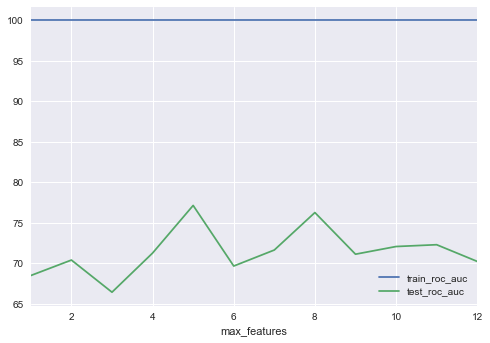

In [146]:
# Find the best value for optimal maximum feature size
param_name = 'max_features'
param_values = list(range(1,X_train.shape[1]))

# Your code here 
res, s = tune_params(param_name,param_values)
s

In [178]:
# Your observations here 

No clear effect on the result (plateaus)
Maybe highest at 5


## Re-train the classifier with chosen values

So now we shall use the best values from each training phase above and feed it back to our classifier and see if have any improvement in predictive performance. 

- Train the classifier with optimal values identified 
- compare the AUC with vanilla DT AUC 
- Interpret the results of comparison

In [152]:
# train a classifier with optimal values identified above
dtc_final = DecisionTreeClassifier()
params={
    'max_depth': 3,
    'min_samples_split': 0.1,
    'min_samples_leaf' : 0.1,
    'max_features' : 5
    
}
dtc_final.set_params(**params)
dtc_final.fit(X_train,y_train)
# Your code here 
calc_roc_auc(X_test,y_test, dtc_final, verbose=True)
# dtc_final.fit(X_train, y_train)
# y_pred = dtc_final(X_test)

# FP, TP,thresh = roc_curve(y_test,y_pred)

# =auc(FP,TP)

roc_curve's auc = 73.301%


73.301

In [ ]:
# You observations here 


In the next section, we shall talk about hyper-parameter tuning using a technique called "grid-search" to make this process even more granular and decisive. 


## Summary 

In this lesson, we looked at tuning a decision tree classifier in order to avoid over fitting and increasing the generalization capabilities of the classifier. For the Titanic dataset, we see that identifying optimal parameter values can result in some improvements towards predictions. This idea will be exploited further in upcoming lessons and labs. 